In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from Tkinter import Tk
from tkFileDialog import askopenfilename
import math
from IPython.display import HTML,display

# List of events and attributes

In [35]:

# Event 1
"""
{
    'latitude' : random.uniform(1.0, 100.0),
    'longitude' : random.uniform(1.0, 100.0),
    'offset' : random.uniform(1.0, 100.0),
    'accuracy' : random.uniform(1.0, 100.0), 
    'timestamp' : datetime.datetime.now()
}
"""

# Event 2
"""
{
    'voltage' : random.uniform(1.0, 100.0), 
    'timestamp' : datetime.datetime.now()
}
"""

# Event 3
"""
{
    'motor_id' : random.randint(1, 10),
    'voltage' : random.uniform(1.0, 100.0),
    'current' : random.uniform(1.0, 100.0), 
    'timestamp' : datetime.datetime.now()
}
"""

# Event 4
"""
{
    'x' : random.uniform(1.0, 100.0),
    'y' : random.uniform(1.0, 100.0),
    'z' : random.uniform(1.0, 100.0),
    'theta' : random.uniform(1.0, 100.0), 
    'timestamp' : datetime.datetime.now()
}
"""

# Event 5
"""
{
    'image_base64': big_image_base64_path, 
    'blob' : False, 
    'timestamp' : datetime.datetime.now()
}
"""

"\n{\n    'image_base64': big_image_base64_path, \n    'blob' : False, \n    'timestamp' : datetime.datetime.now()\n}\n"

# List of Queries

1. Get RGB events(without blob) for last 10 seconds

2. Get RGB events(with blob) for last 10 seconds

3. Get first 10 PoseEvents generated today

4. Get all Pose generated between certain latitude and longitude range

In [2]:
# this function to get avgs of each event to write in to database
def get_avg(files):
    avgs = np.zeros((0,6))
    for file in files:
        with open(file) as fp:
            lines = fp.readlines()

        event_one = np.zeros((1,0))
        event_two = np.zeros((1,0))
        event_three = np.zeros((1,0))
        event_four = np.zeros((1,0))
        event_five = np.zeros((1,0))
        event_six = np.zeros((1,0))

        for line in lines:
            if "Robot_id" in line:
                splitted_line = line.split(" ")
                if splitted_line[7] is '0':
                    event_one = np.hstack([event_one,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '1':
                    event_two = np.hstack([event_two,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '2':
                    event_three = np.hstack([event_three,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '3':
                    event_four = np.hstack([event_four,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '4':
                    event_five = np.hstack([event_five,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '5':
                    event_six = np.hstack([event_six,[[float(splitted_line[8])]]]) 
        avgs = np.vstack([avgs,[np.average(event_one),np.average(event_two),np.average(event_three),
                       np.average(event_four),np.average(event_five),np.average(event_six)]])
    return avgs
# use the below function only for parsing neo4j write logs
def get_avg_neo(files):
    avgs = np.zeros((0,6))
    for file in files:
        with open(file) as fp:
            lines = fp.readlines()

        event_one = np.zeros((1,0))
        event_two = np.zeros((1,0))
        event_three = np.zeros((1,0))
        event_four = np.zeros((1,0))
        event_five = np.zeros((1,0))
        event_six = np.zeros((1,0))

        for line in lines:
            if "Robot_id" in line:
                splitted_line = line.split(" ")
                if splitted_line[6] is '1':
                    event_one = np.hstack([event_one,[[float(splitted_line[7])]]])
                elif splitted_line[6] is '2':
                    event_two = np.hstack([event_two,[[float(splitted_line[7])]]])
                elif splitted_line[6] is '3':
                    event_three = np.hstack([event_three,[[float(splitted_line[7])]]])
                elif splitted_line[6] is '4':
                    event_four = np.hstack([event_four,[[float(splitted_line[7])]]])
                elif splitted_line[6] is '5':
                    event_five = np.hstack([event_five,[[float(splitted_line[7])]]])
                elif splitted_line[6] is '6':
                    event_six = np.hstack([event_six,[[float(splitted_line[7])]]]) 
        avgs = np.vstack([avgs,[np.average(event_one),np.average(event_two),np.average(event_three),
                       np.average(event_four),np.average(event_five),np.average(event_six)]])
    return avgs

def get_avg_read(files):
    avgs = np.zeros((0,4))
    for file in files:
        with open(file) as fp:
            lines = fp.readlines()
            
        query_one = np.zeros((1,0))
        query_two = np.zeros((1,0))
        query_three = np.zeros((1,0))
        query_four = np.zeros((1,0))

        for line in lines:
            if "Robot_id" in line:
                splitted_line = line.split(" ")
                if splitted_line[7] is '0':
                    query_one = np.hstack([query_one,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '1':
                    query_two = np.hstack([query_two,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '2':
                    query_three = np.hstack([query_three,[[float(splitted_line[8])]]])
                elif splitted_line[7] is '3':
                    query_four = np.hstack([query_four,[[float(splitted_line[8])]]])
        avgs = np.vstack([avgs,[np.average(query_one),np.average(query_two),np.average(query_three),
                               np.average(query_four)]])
    return avgs

def get_replica_results(files):
        result = []
        #get the write time stamp
        with open(files[0]) as fp:
            lines = fp.readlines()
        write_vals = {}
        for line in lines:
            if "replica_test_write" in line:
                splitted_line = line.split(" ")
                timestamp = splitted_line[9] + " " + splitted_line[10].split("\n")[0]
                write_vals[splitted_line[7]] = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')
        
        #get the read time stamp
        with open(files[1]) as fp:
            lines = fp.readlines()
        read_vals = {}
        for line in lines:
            if "replica_test_read" in line:
                splitted_line = line.split(" ")
                timestamp = splitted_line[9] + " " + splitted_line[10].split("\n")[0]
                read_vals[splitted_line[7]] = datetime.strptime(timestamp, '%Y-%m-%d %H:%M:%S.%f')  
        
        for key,value in read_vals.iteritems():
            diff = value-write_vals[key]
            result.append(float(str(diff).split(".")[1])/1000000)
        return round(np.average(result),4)
        
def open_files(n):
    files = []
    for i in range(n):
        Tk().withdraw() # we don't want a full GUI, so keep the root window from appearing
        filename = askopenfilename() # show an "Open" dialog box and return the path to the selected file
        files.append(filename)
    return files

# Write performance for Neo4J and OrientDB (Robot 1)

In [55]:
neo_files_1 = open_files(3)
orient_files_1 = open_files(3)

In [56]:

neo_avgs_1 = get_avg_neo(neo_files_1)
neo_df_1 = pd.DataFrame(neo_avgs_1, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])


orient_avgs_1 = get_avg(orient_files_1)
orient_df_1 = pd.DataFrame(orient_avgs_1, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])


Text(0,0.5,u'Average query execution time (Seconds)')

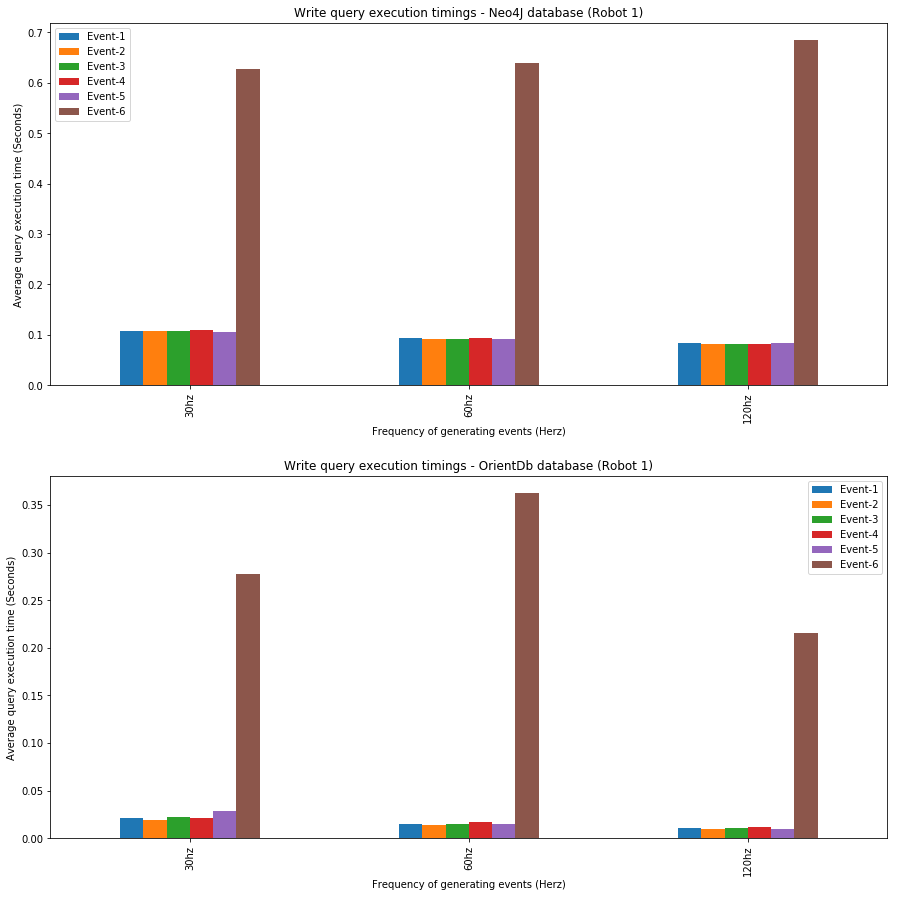

In [68]:
#Init subplots with height and width
fig_1, axes_1 = plt.subplots(nrows=2, ncols=1)
fig_1.set_figheight(15)
fig_1.set_figwidth(15)
fig_1.subplots_adjust(hspace=.25)

#Ploting the averate values from neo4j and orientDB
neo_plot_1 = neo_df_1.plot(ax=axes_1[0],kind='bar')
orient_plot_1 = orient_df_1.plot(ax=axes_1[1],kind='bar')

#Setting title for subplots
neo_plot_1.set_title("Write query execution timings - Neo4J database (Robot 1)")
neo_plot_1.set_xlabel("Frequency of generating events (Herz)")
neo_plot_1.set_ylabel("Average query execution time (Seconds)")

orient_plot_1.set_title("Write query execution timings - OrientDb database (Robot 1)")
orient_plot_1.set_xlabel("Frequency of generating events (Herz)")
orient_plot_1.set_ylabel("Average query execution time (Seconds)")

In [82]:
print "Write query execution timings - Neo4J database (Robot 1)"
HTML(neo_df_1.to_html(classes="table table-striped table-bordered"))

Write query execution timings - Neo4J database (Robot 1)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.108357,0.107107,0.108078,0.109604,0.105533,0.626815
60hz,0.093357,0.091464,0.091945,0.093043,0.092700,0.640276
120hz,0.083857,0.081955,0.081966,0.081659,0.083261,0.684756


In [83]:
print "Write query execution timings - OrientDB database (Robot 1)"
HTML(orient_df_1.to_html(classes="table table-striped table-bordered"))

Write query execution timings - OrientDB database (Robot 1)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.021443,0.019567,0.022520,0.021469,0.028925,0.277428
60hz,0.015330,0.014337,0.015025,0.016958,0.014800,0.362468
120hz,0.010405,0.009881,0.010414,0.012124,0.009918,0.215152


# Write performance along with reading for Neo4J (Robot 1)

In [9]:
neo_files_war_1 = open_files(3)

In [10]:

neo_avgs_war_1 = get_avg_neo(neo_files_war_1)
neo_df_war_1 = pd.DataFrame(neo_avgs_war_1, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])


Text(0,0.5,u'Average query execution time (Seconds)')

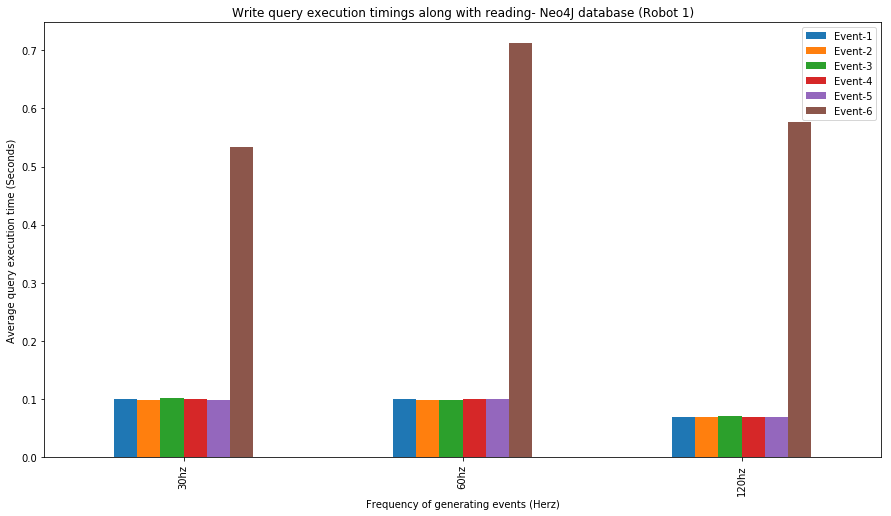

In [16]:
#Init subplots with height and width
fig_war_1, axes_war_1 = plt.subplots(nrows=1, ncols=1)
fig_war_1.set_figheight(8)
fig_war_1.set_figwidth(15)
fig_war_1.subplots_adjust(hspace=.25)

#Ploting the averate values from neo4j and orientDB
neo_plot_war_1 = neo_df_war_1.plot(ax=axes_war_1,kind='bar')

#Setting title for subplots
neo_plot_war_1.set_title("Write query execution timings along with reading- Neo4J database (Robot 1)")
neo_plot_war_1.set_xlabel("Frequency of generating events (Herz)")
neo_plot_war_1.set_ylabel("Average query execution time (Seconds)")

In [18]:
print "Write query execution timings along with reading- Neo4J database (Robot 1)"
HTML(neo_df_war_1.to_html(classes="table table-striped table-bordered"))

Write query execution timings along with reading- Neo4J database (Robot 1)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.099707,0.098378,0.101618,0.100307,0.098450,0.533962
60hz,0.100643,0.099033,0.099171,0.099605,0.099805,0.712155
120hz,0.069795,0.069252,0.070408,0.069979,0.069794,0.575710


# Write performance for Neo4J and OrientDB (Robot 2)

In [72]:
neo_files_2 = open_files(3)
orient_files_2 = open_files(3)

In [73]:

neo_avgs_2 = get_avg_neo(neo_files_2)
neo_df_2 = pd.DataFrame(neo_avgs_2, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])


orient_avgs_2 = get_avg(orient_files_2)
orient_df_2 = pd.DataFrame(orient_avgs_2, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])


Text(0,0.5,u'Average query execution time (Seconds)')

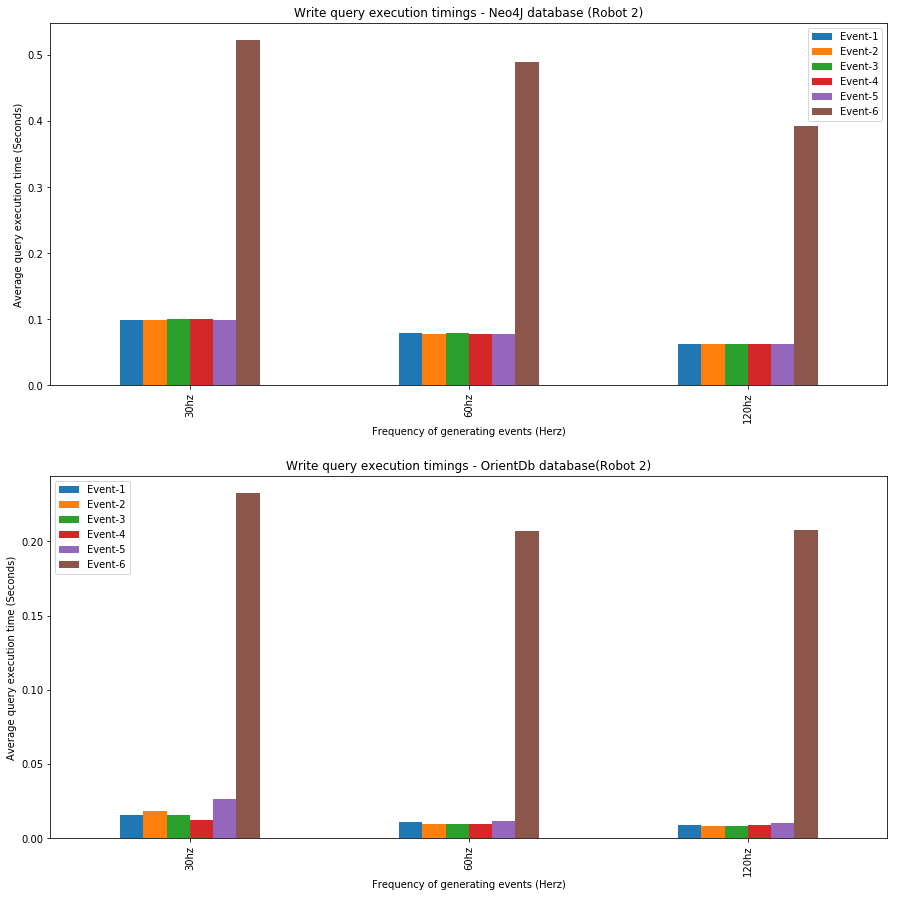

In [75]:
#Init subplots with height and width
fig_2, axes_2 = plt.subplots(nrows=2, ncols=1)
fig_2.subplots_adjust(hspace=.25)
fig_2.set_figheight(15)
fig_2.set_figwidth(15)

#Ploting the averate values from neo4j and orientDB
neo_plot_2 = neo_df_2.plot(ax=axes_2[0],kind='bar')
orient_plot_2 = orient_df_2.plot(ax=axes_2[1],kind='bar')

#Setting title for subplots
neo_plot_2.set_title("Write query execution timings - Neo4J database (Robot 2)")
neo_plot_2.set_xlabel("Frequency of generating events (Herz)")
neo_plot_2.set_ylabel("Average query execution time (Seconds)")

orient_plot_2.set_title("Write query execution timings - OrientDb database(Robot 2)")
orient_plot_2.set_xlabel("Frequency of generating events (Herz)")
orient_plot_2.set_ylabel("Average query execution time (Seconds)")

In [79]:
print "Write query execution timings - Neo4J database (Robot 2)"
HTML(neo_df_2.to_html(classes="table table-striped table-bordered"))

Write query execution timings - Neo4J database (Robot 2)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.099008,0.098303,0.099902,0.099658,0.098235,0.522704
60hz,0.078495,0.077696,0.078581,0.078416,0.078352,0.490067
120hz,0.063169,0.062207,0.063203,0.063236,0.062470,0.392051


In [80]:
print "Write query execution timings - OrientDB database (Robot 2)"
HTML(orient_df_2.to_html(classes="table table-striped table-bordered"))

Write query execution timings - OrientDB database (Robot 2)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.015659,0.018587,0.015761,0.012546,0.026548,0.232383
60hz,0.010724,0.009726,0.009659,0.009442,0.011393,0.206819
120hz,0.008829,0.008050,0.008037,0.009013,0.010385,0.207246


# Write performance along with reading for Neo4J (Robot 2)

In [ ]:
neo_files_war_2 = open_files(3)

In [ ]:
neo_avgs_war_2 = get_avg_neo(neo_files_war_2)
neo_df_war_2 = pd.DataFrame(neo_avgs_war_2, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])


Text(0,0.5,u'Average query execution time (Seconds)')

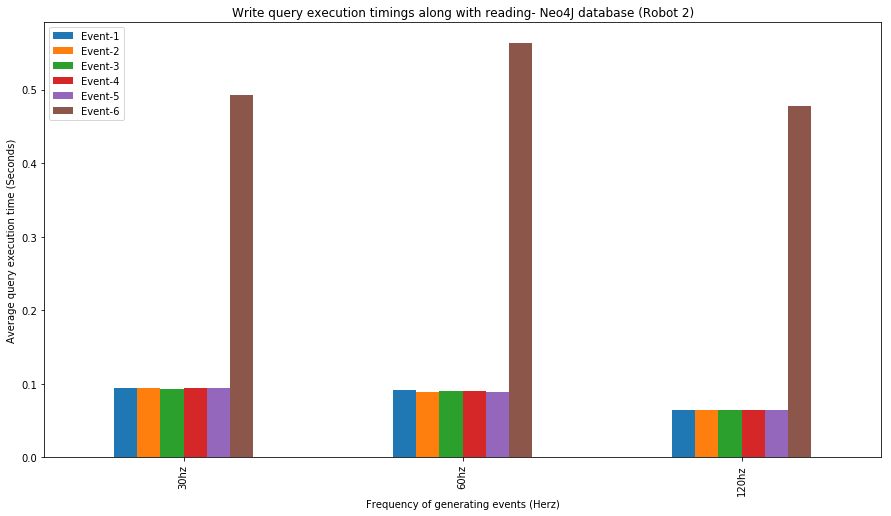

In [24]:
#Init subplots with height and width
fig_war_2, axes_war_2 = plt.subplots(nrows=1, ncols=1)
fig_war_2.set_figheight(8)
fig_war_2.set_figwidth(15)
fig_war_2.subplots_adjust(hspace=.25)

#Ploting the averate values from neo4j and orientDB
neo_plot_war_2 = neo_df_war_2.plot(ax=axes_war_2,kind='bar')

#Setting title for subplots
neo_plot_war_2.set_title("Write query execution timings along with reading- Neo4J database (Robot 2)")
neo_plot_war_2.set_xlabel("Frequency of generating events (Herz)")
neo_plot_war_2.set_ylabel("Average query execution time (Seconds)")

In [25]:
print "Write query execution timings along with reading- Neo4J database (Robot 2)"
HTML(neo_df_war_2.to_html(classes="table table-striped table-bordered"))

Write query execution timings along with reading- Neo4J database (Robot 2)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.094647,0.093630,0.093394,0.094216,0.093696,0.492411
60hz,0.091462,0.089367,0.090860,0.089921,0.089461,0.563369
120hz,0.064929,0.063765,0.064485,0.064733,0.063892,0.477676


# Write performance for Neo4J and OrientDB (Robot 3)

In [3]:
neo_files_3 = open_files(3)
orient_files_3 = open_files(3)

In [4]:
neo_avgs_3 = get_avg_neo(neo_files_3)
neo_df_3 = pd.DataFrame(neo_avgs_3, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])


orient_avgs_3 = get_avg(orient_files_3)
orient_df_3 = pd.DataFrame(orient_avgs_3, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])

Text(0,0.5,u'Average query execution time (Seconds)')

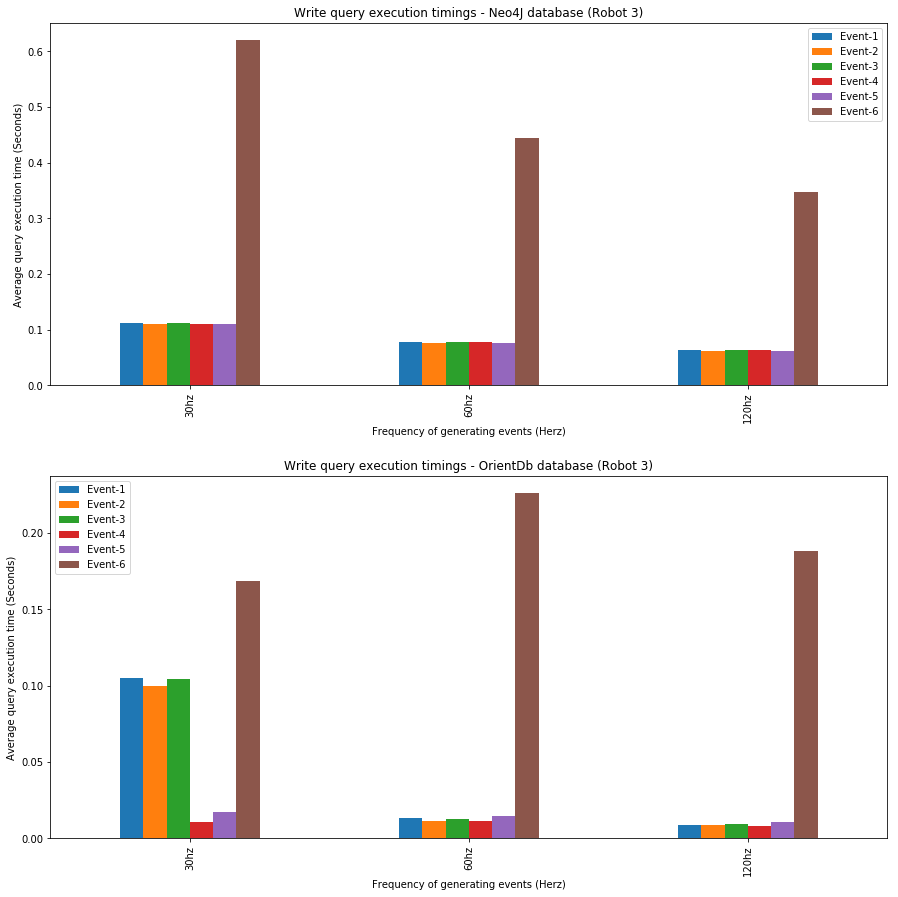

In [6]:
#Init subplots with height and width
fig_3, axes_3 = plt.subplots(nrows=2, ncols=1)
fig_3.set_figheight(15)
fig_3.set_figwidth(15)
fig_3.subplots_adjust(hspace=.25)

#Ploting the averate values from neo4j and orientDB
neo_plot_3 = neo_df_3.plot(ax=axes_3[0],kind='bar')
orient_plot_3 = orient_df_3.plot(ax=axes_3[1],kind='bar')

#Setting title for subplots
neo_plot_3.set_title("Write query execution timings - Neo4J database (Robot 3)")
neo_plot_3.set_xlabel("Frequency of generating events (Herz)")
neo_plot_3.set_ylabel("Average query execution time (Seconds)")

orient_plot_3.set_title("Write query execution timings - OrientDb database (Robot 3)")
orient_plot_3.set_xlabel("Frequency of generating events (Herz)")
orient_plot_3.set_ylabel("Average query execution time (Seconds)")

In [7]:
print "Write query execution timings - Neo4J database (Robot 3)"
HTML(neo_df_3.to_html(classes="table table-striped table-bordered"))

Write query execution timings - Neo4J database (Robot 3)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.112315,0.110434,0.111139,0.110892,0.110778,0.620318
60hz,0.077442,0.076039,0.077621,0.077380,0.076529,0.443877
120hz,0.062978,0.061585,0.062658,0.063184,0.062412,0.347923


In [8]:
print "Write query execution timings - OrientDB database (Robot 3)"
HTML(orient_df_3.to_html(classes="table table-striped table-bordered"))

Write query execution timings - OrientDB database (Robot 3)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.105092,0.099924,0.104623,0.010752,0.017228,0.168473
60hz,0.013389,0.011349,0.012784,0.011056,0.014885,0.226145
120hz,0.008670,0.008746,0.009305,0.008164,0.010478,0.188466


# Write performance along with reading for Neo4J (Robot 3)

In [26]:
neo_files_war_3 = open_files(3)

In [27]:
neo_avgs_war_3 = get_avg_neo(neo_files_war_3)
neo_df_war_3 = pd.DataFrame(neo_avgs_war_3, columns=['Event-1', 'Event-2', 'Event-3', 'Event-4','Event-5','Event-6'],
                   index=['30hz','60hz','120hz'])

Text(0,0.5,u'Average query execution time (Seconds)')

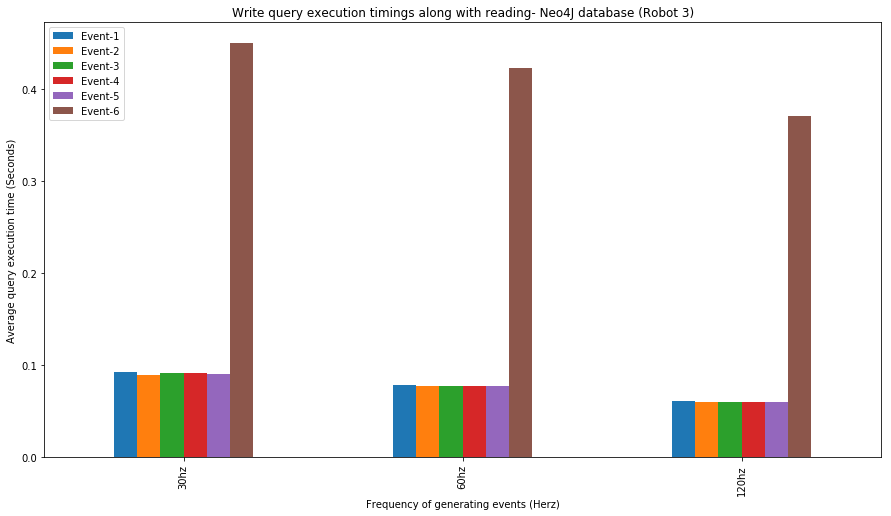

In [29]:
#Init subplots with height and width
fig_war_3, axes_war_3 = plt.subplots(nrows=1, ncols=1)
fig_war_3.set_figheight(8)
fig_war_3.set_figwidth(15)
fig_war_3.subplots_adjust(hspace=.25)

#Ploting the averate values from neo4j and orientDB
neo_plot_war_3 = neo_df_war_3.plot(ax=axes_war_3,kind='bar')

#Setting title for subplots
neo_plot_war_3.set_title("Write query execution timings along with reading- Neo4J database (Robot 3)")
neo_plot_war_3.set_xlabel("Frequency of generating events (Herz)")
neo_plot_war_3.set_ylabel("Average query execution time (Seconds)")

In [30]:
print "Write query execution timings along with reading- Neo4J database (Robot 3)"
HTML(neo_df_war_3.to_html(classes="table table-striped table-bordered"))

Write query execution timings along with reading- Neo4J database (Robot 3)


,Event-1,Event-2,Event-3,Event-4,Event-5,Event-6
30hz,0.092130,0.089018,0.091255,0.091040,0.090422,0.449641
60hz,0.078176,0.077662,0.077667,0.077938,0.077824,0.422819
120hz,0.060787,0.059505,0.060372,0.060577,0.059988,0.370125


# Read performance for Neo4J and OrientDB (Robot 1)

In [84]:
neo_files_1_read = open_files(3)
orient_files_1_read = open_files(3)

In [87]:
neo_avgs_1_read = get_avg_read(neo_files_1_read)
neo_df_1_read = pd.DataFrame(neo_avgs_1_read, columns=['Query-1', 'Query-2', 'Query-3','Query-4'],
                   index=['30hz','60hz','120hz'])


orient_avgs_1_read = get_avg_read(orient_files_1_read)
orient_df_1_read = pd.DataFrame(orient_avgs_1_read, columns=['Query-1', 'Query-2', 'Query-3','Query-4'],
                   index=['30hz','60hz','120hz'])


Text(0,0.5,u'Average query execution time (Seconds)')

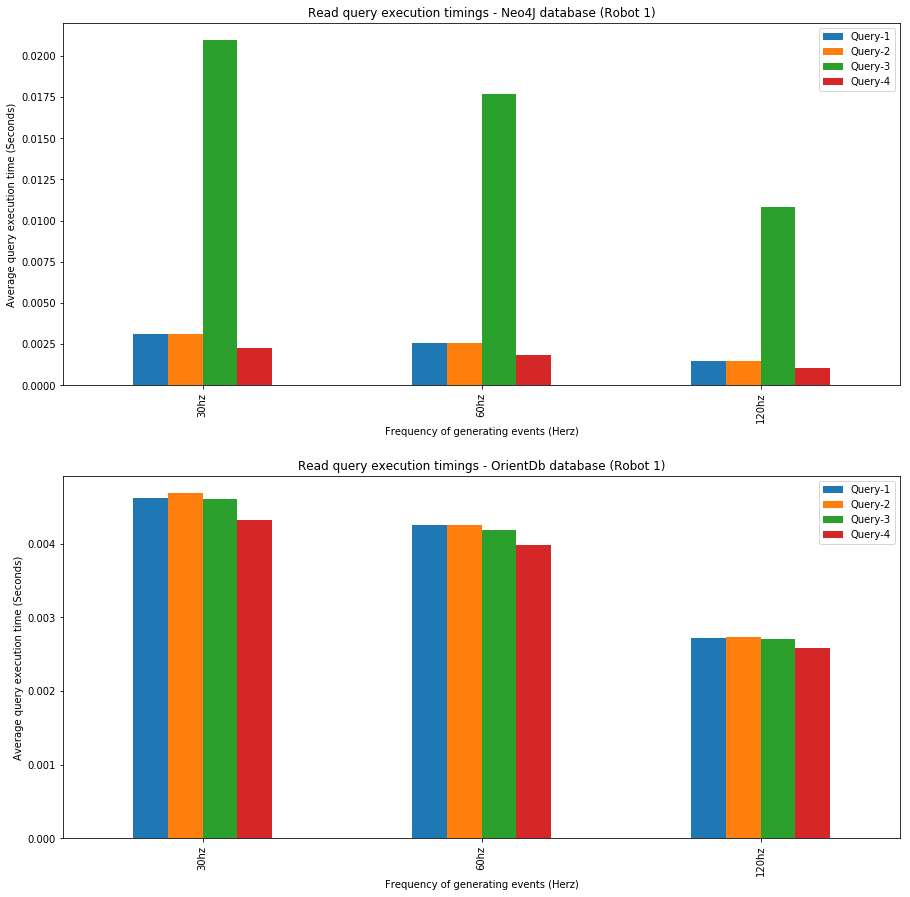

In [89]:
#Init subplots with height and width
fig_1_read, axes_1_read = plt.subplots(nrows=2, ncols=1)
fig_1_read.set_figheight(15)
fig_1_read.set_figwidth(15)
fig_1_read.subplots_adjust(hspace=.25)

#Ploting the averate values from neo4j and orientDB
neo_plot_1_read = neo_df_1_read.plot(ax=axes_1_read[0],kind='bar')
orient_plot_1_read = orient_df_1_read.plot(ax=axes_1_read[1],kind='bar')

#Setting title for subplots
neo_plot_1_read.set_title("Read query execution timings - Neo4J database (Robot 1)")
neo_plot_1_read.set_xlabel("Frequency of generating events (Herz)")
neo_plot_1_read.set_ylabel("Average query execution time (Seconds)")

orient_plot_1_read.set_title("Read query execution timings - OrientDb database (Robot 1)")
orient_plot_1_read.set_xlabel("Frequency of generating events (Herz)")
orient_plot_1_read.set_ylabel("Average query execution time (Seconds)")

In [90]:
print "Read query execution timings - Neo4J database (Robot 1)"
HTML(neo_df_1_read.to_html(classes="table table-striped table-bordered"))

Read query execution timings - Neo4J database (Robot 1)


,Query-1,Query-2,Query-3,Query-4
30hz,0.003102,0.003086,0.020956,0.002247
60hz,0.002563,0.002546,0.017694,0.001856
120hz,0.001475,0.001479,0.010849,0.001072


In [91]:
print "Read query execution timings - OrientDB database (Robot 1)"
HTML(orient_df_1_read.to_html(classes="table table-striped table-bordered"))

Read query execution timings - OrientDB database (Robot 1)


,Query-1,Query-2,Query-3,Query-4
30hz,0.004626,0.004688,0.004615,0.004328
60hz,0.004258,0.004252,0.004187,0.003984
120hz,0.002719,0.002739,0.002705,0.002585


# Read performance for Neo4J and OrientDB (Robot 2)

In [92]:
neo_files_2_read = open_files(3)
orient_files_2_read = open_files(3)

In [93]:
neo_avgs_2_read = get_avg_read(neo_files_2_read)
neo_df_2_read = pd.DataFrame(neo_avgs_2_read, columns=['Query-1', 'Query-2', 'Query-3','Query-4'],
                   index=['30hz','60hz','120hz'])

orient_avgs_2_read = get_avg_read(orient_files_2_read)
orient_df_2_read = pd.DataFrame(orient_avgs_2_read, columns=['Query-1', 'Query-2', 'Query-3','Query-4'],
                   index=['30hz','60hz','120hz'])


Text(0,0.5,u'Average query execution time (Seconds)')

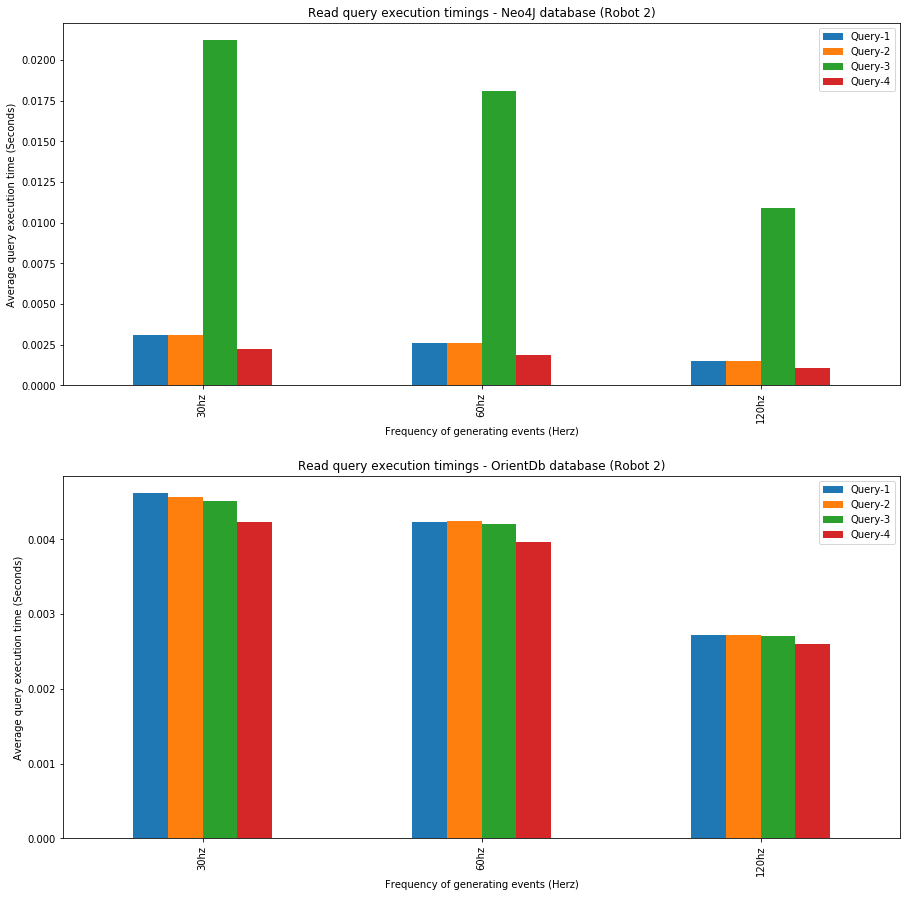

In [94]:
#Init subplots with height and width
fig_2_read, axes_2_read = plt.subplots(nrows=2, ncols=1)
fig_2_read.set_figheight(15)
fig_2_read.set_figwidth(15)
fig_2_read.subplots_adjust(hspace=.25)

#Ploting the averate values from neo4j and orientDB
neo_plot_2_read = neo_df_2_read.plot(ax=axes_2_read[0],kind='bar')
orient_plot_2_read = orient_df_2_read.plot(ax=axes_2_read[1],kind='bar')

#Setting title for subplots
neo_plot_2_read.set_title("Read query execution timings - Neo4J database (Robot 2)")
neo_plot_2_read.set_xlabel("Frequency of generating events (Herz)")
neo_plot_2_read.set_ylabel("Average query execution time (Seconds)")

orient_plot_2_read.set_title("Read query execution timings - OrientDb database (Robot 2)")
orient_plot_2_read.set_xlabel("Frequency of generating events (Herz)")
orient_plot_2_read.set_ylabel("Average query execution time (Seconds)")

In [104]:
print "Average read query execution timings - Neo4J database (Robot 2)"
HTML(neo_df_2_read.to_html(classes="table table-striped table-bordered"))

Average read query execution timings - Neo4J database (Robot 2)


,Query-1,Query-2,Query-3,Query-4
30hz,0.003082,0.003068,0.021210,0.002242
60hz,0.002596,0.002592,0.018059,0.001855
120hz,0.001488,0.001492,0.010893,0.001065


In [105]:
print "Average read query execution timings - OrientDB database (Robot 2)"
HTML(orient_df_2_read.to_html(classes="table table-striped table-bordered"))

Average read query execution timings - OrientDB database (Robot 2)


,Query-1,Query-2,Query-3,Query-4
30hz,0.004618,0.004565,0.004511,0.004238
60hz,0.004229,0.004250,0.004199,0.003970
120hz,0.002725,0.002719,0.002707,0.002594


# Read performance for Neo4J and OrientDB (Robot 3)

In [97]:
neo_files_3_read = open_files(3)
orient_files_3_read = open_files(3)

In [98]:
neo_avgs_3_read = get_avg_read(neo_files_3_read)
neo_df_3_read = pd.DataFrame(neo_avgs_3_read, columns=['Query-1', 'Query-2', 'Query-3','Query-4'],
                   index=['30hz','60hz','120hz'])


orient_avgs_3_read = get_avg_read(orient_files_3_read)
orient_df_3_read = pd.DataFrame(orient_avgs_3_read, columns=['Query-1', 'Query-2', 'Query-3','Query-4'],
                   index=['30hz','60hz','120hz'])

Text(0,0.5,u'Average query execution time (Seconds)')

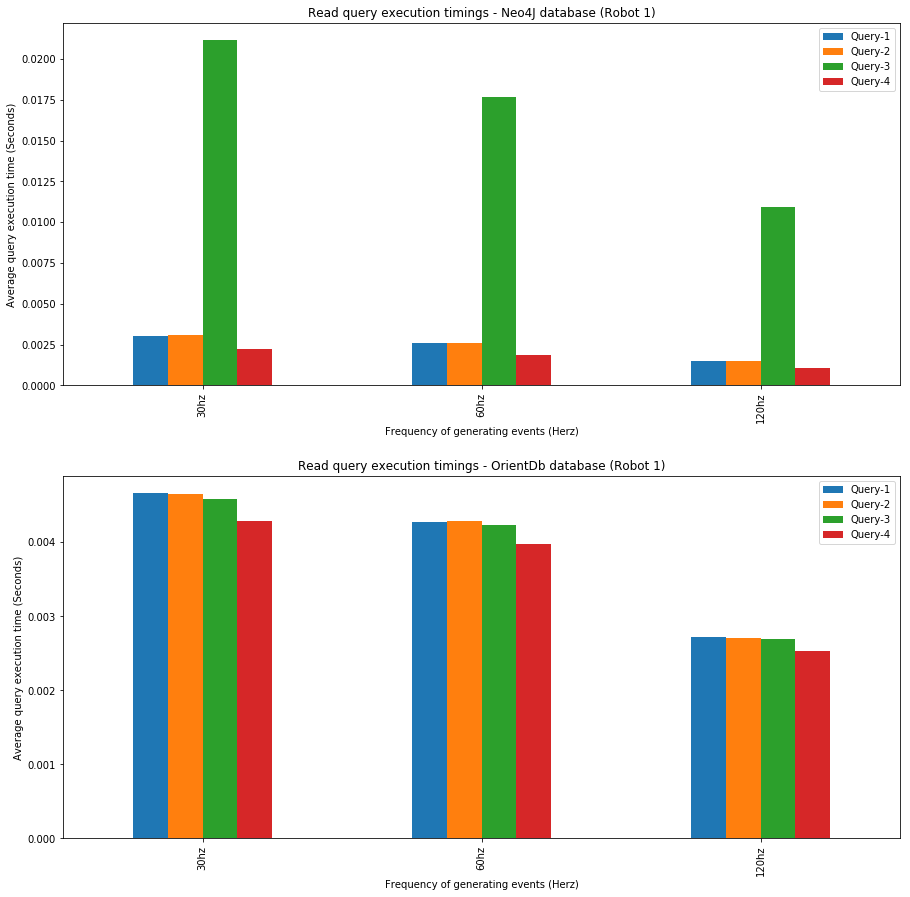

In [99]:
#Init subplots with height and width
fig_3_read, axes_3_read = plt.subplots(nrows=2, ncols=1)
fig_3_read.set_figheight(15)
fig_3_read.set_figwidth(15)
fig_3_read.subplots_adjust(hspace=.25)

#Ploting the averate values from neo4j and orientDB
neo_plot_3_read = neo_df_3_read.plot(ax=axes_3_read[0],kind='bar')
orient_plot_3_read = orient_df_3_read.plot(ax=axes_3_read[1],kind='bar')

#Setting title for subplots
neo_plot_3_read.set_title("Read query execution timings - Neo4J database (Robot 1)")
neo_plot_3_read.set_xlabel("Frequency of generating events (Herz)")
neo_plot_3_read.set_ylabel("Average query execution time (Seconds)")

orient_plot_3_read.set_title("Read query execution timings - OrientDb database (Robot 1)")
orient_plot_3_read.set_xlabel("Frequency of generating events (Herz)")
orient_plot_3_read.set_ylabel("Average query execution time (Seconds)")

In [106]:
print "Average read query execution timings - Neo4J database (Robot 3)"
HTML(neo_df_3_read.to_html(classes="table table-striped table-bordered"))

Average read query execution timings - Neo4J database (Robot 3)


,Query-1,Query-2,Query-3,Query-4
30hz,0.003045,0.003074,0.021156,0.002214
60hz,0.002569,0.002577,0.017665,0.001842
120hz,0.001488,0.001487,0.010909,0.001070


In [107]:
print "Average read query execution timings - OrientDB database (Robot 3)"
HTML(orient_df_3_read.to_html(classes="table table-striped table-bordered"))

Average read query execution timings - OrientDB database (Robot 3)


,Query-1,Query-2,Query-3,Query-4
30hz,0.004662,0.004651,0.004581,0.004290
60hz,0.004270,0.004280,0.004235,0.003978
120hz,0.002720,0.002706,0.002692,0.002530
